In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


data = pd.read_csv("Crop_recommendation.csv")
data.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [2]:
print("Dimension of the dataset is:")
print(data.shape)

Dimension of the dataset is:
(2200, 8)


In [3]:
print("Attributes of the dataset are:")
print(data.columns)

Attributes of the dataset are:
Index(['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph',
       'rainfall', 'label'],
      dtype='object')


In [4]:
print("5 number summary of the data:")
print(data.describe())

5 number summary of the data:
          Nitrogen   phosphorus    potassium  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [5]:
print("Type of each column:")
for col in data.columns:
    col_type = data[col].dtype
    print("Column:", col, " - Data Type:", col_type)

Type of each column:
Column: Nitrogen  - Data Type: int64
Column: phosphorus  - Data Type: int64
Column: potassium  - Data Type: int64
Column: temperature  - Data Type: float64
Column: humidity  - Data Type: float64
Column: ph  - Data Type: float64
Column: rainfall  - Data Type: float64
Column: label  - Data Type: object


Scatter plot for all pairs of columns:


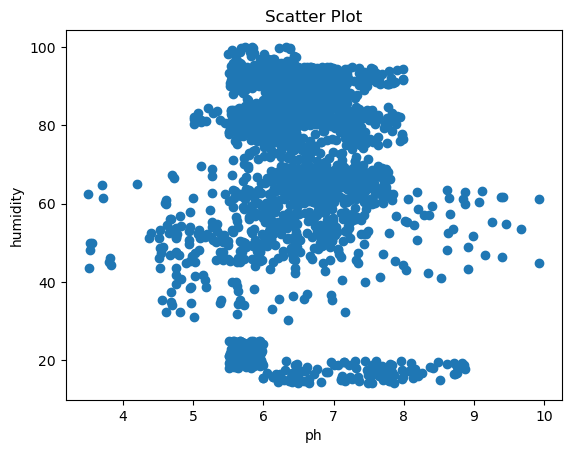

In [6]:
print("Scatter plot for all pairs of columns:")
columns = ["ph", "humidity"]
for i in range(len(columns) - 1):
    for j in range(i + 1, len(columns)):
        x_axis = columns[i]
        y_axis = columns[j]
        plt.scatter(data[x_axis], data[y_axis])
        plt.title("Scatter Plot")
        plt.xlabel(x_axis)
        plt.ylabel(y_axis)
        plt.show()

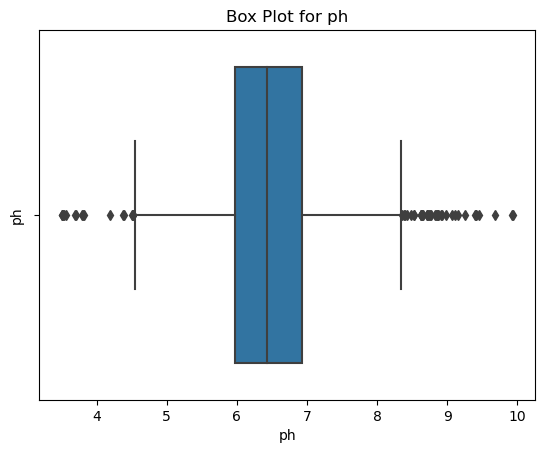

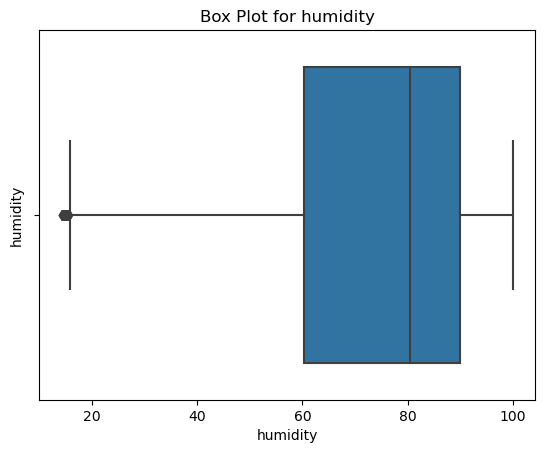

In [7]:
attributes = ["ph", "humidity"]
for i in attributes:
    sns.boxplot(x=data[i])
    plt.title("Box Plot for " + i)
    plt.ylabel(i)
    plt.show()

In [8]:
attribute = "ph"
mean = data[attribute].mean()
print("Mean :", mean)

Q1 = data[attribute].quantile(0.25)
Q3 = data[attribute].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
trimmed_data = [i for i in data[attribute] if i>=lower_bound and i<=upper_bound]
print("Trimmed Mean:",np.mean(trimmed_data))

Mean : 6.469480065256368
Trimmed Mean: 6.445987485865142


In [9]:
median = data[attribute].median()
print("Median :", median)

Median : 6.42504527


Mode : [3.50475231]
Positively skewed


C:\Users\SURYA\AppData\Local\Temp\ipykernel_19316\2555375950.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data[attribute])


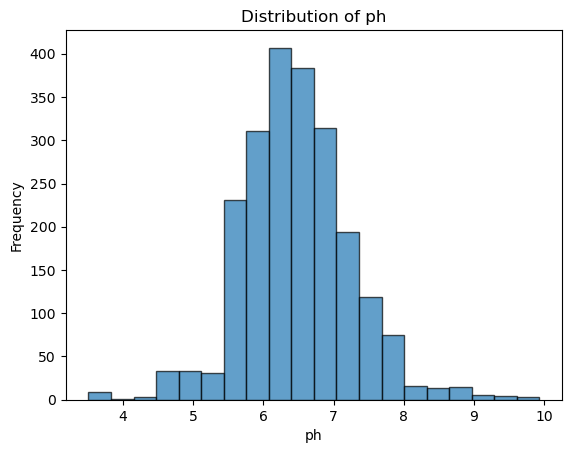

In [10]:
mode_result = stats.mode(data[attribute])
if len(mode_result) == 0:
    print("No mode found")
else:
    mode_value = mode_result[0]
    print("Mode :", mode_value)

if mean > median:
    print("Positively skewed")
elif mean < median:
    print("Negatively skewed")
else:
    print("Symmetric")

plt.hist(data[attribute], bins=20, edgecolor='black', alpha=0.7)
plt.title("Distribution of " + attribute)
plt.xlabel(attribute)
plt.ylabel("Frequency")
plt.show()

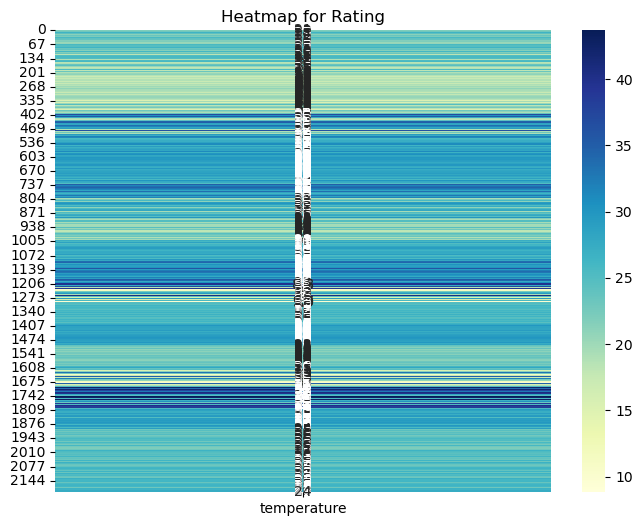

In [11]:
df = data[["temperature"]]
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap='YlGnBu')
plt.title("Heatmap for Rating")
plt.show()


In [12]:
attribute = "potassium"
print("Data dispersion measures:")
print("Before ignoring extreme values")
sd = data[attribute].std()
print("Standard Deviation :", sd)
print("Variance :", sd**2)
print("After ignoring extreme values")
list1 = data[attribute].to_list()
max_value = max(list1)
min_value = min(list1)
trimmed_list = [i for i in list1 if i != max_value and i != min_value]
trimmed_std = np.nanstd(trimmed_list)
print("Standard Deviation",trimmed_std)
print("Variance :",trimmed_std**2)

Data dispersion measures:
Before ignoring extreme values
Standard Deviation : 50.64793054666006
Variance : 2565.212868659301
After ignoring extreme values
Standard Deviation 48.814576110520015
Variance : 2382.8628408497516


In [13]:
X = data.drop(columns=['label'])
X

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [14]:
y = data['label']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [16]:
clf1 = DecisionTreeClassifier()
clf1.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
y_pred = clf1.predict(X_test)

Accuracy: 0.98
Precision: 0.98
Recall (Sensitivity): 0.98
Specificity: 1.00
F1 Score: 0.98


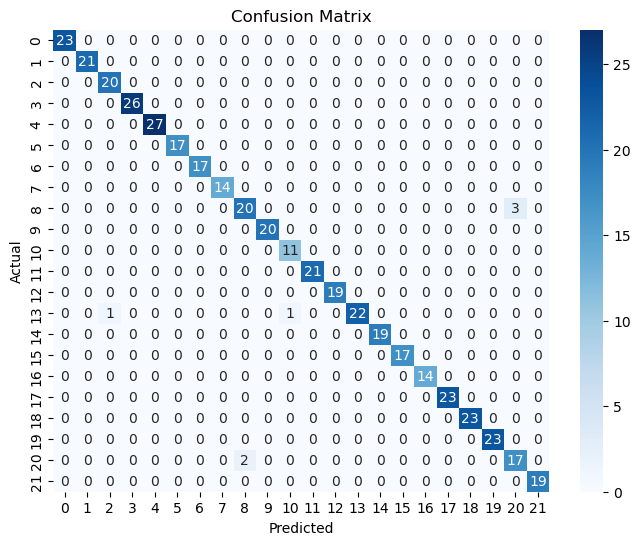

In [18]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')  # Use 'micro' for multiclass problems
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

conf_matrix = confusion_matrix(y_test, y_pred)

tn = np.sum(conf_matrix) - np.sum(conf_matrix[0, :]) - np.sum(conf_matrix[:, 0]) + conf_matrix[0, 0]
fp = np.sum(conf_matrix[0, :]) - conf_matrix[0, 0]
specificity = tn / (tn + fp)


print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall (Sensitivity): {:.2f}".format(recall))
print("Specificity: {:.2f}".format(specificity))
print("F1 Score: {:.2f}".format(f1))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [19]:
clf2 = RandomForestClassifier(n_estimators=100, random_state=42) 
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)


Accuracy: 0.99
Precision: 0.99
Recall (Sensitivity): 0.99
Specificity: 1.00
F1 Score: 0.99


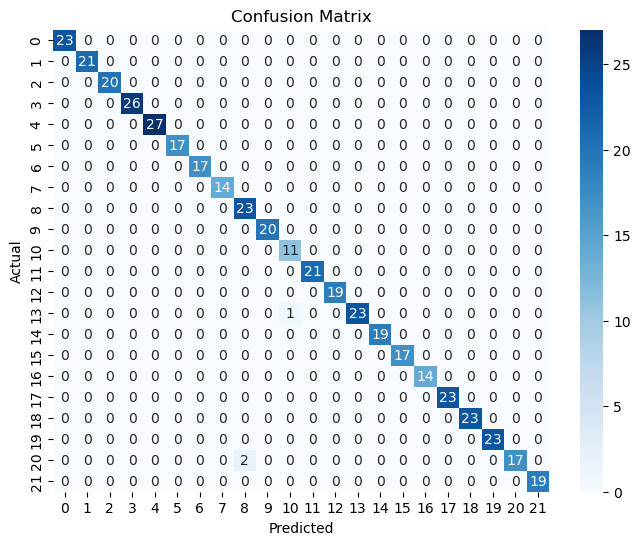

In [20]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')  # Use 'micro' for multiclass problems
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

conf_matrix = confusion_matrix(y_test, y_pred)

tn = np.sum(conf_matrix) - np.sum(conf_matrix[0, :]) - np.sum(conf_matrix[:, 0]) + conf_matrix[0, 0]
fp = np.sum(conf_matrix[0, :]) - conf_matrix[0, 0]
specificity = tn / (tn + fp)


print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall (Sensitivity): {:.2f}".format(recall))
print("Specificity: {:.2f}".format(specificity))
print("F1 Score: {:.2f}".format(f1))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [21]:
clf3 = svm.SVC(kernel='linear') 
clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_test)

Accuracy: 0.98
Precision: 0.98
Recall (Sensitivity): 0.98
Specificity: 1.00
F1 Score: 0.98


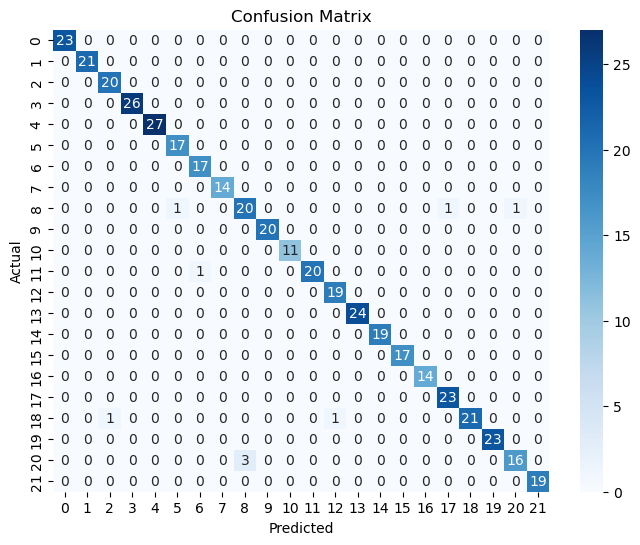

In [22]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')  # Use 'micro' for multiclass problems
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

conf_matrix = confusion_matrix(y_test, y_pred)

tn = np.sum(conf_matrix) - np.sum(conf_matrix[0, :]) - np.sum(conf_matrix[:, 0]) + conf_matrix[0, 0]
fp = np.sum(conf_matrix[0, :]) - conf_matrix[0, 0]
specificity = tn / (tn + fp)


print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall (Sensitivity): {:.2f}".format(recall))
print("Specificity: {:.2f}".format(specificity))
print("F1 Score: {:.2f}".format(f1))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [23]:
clf4 = KNeighborsClassifier(n_neighbors=5)
clf4.fit(X_train, y_train)
y_pred = clf4.predict(X_test)

D:\Program Files\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.97
Precision: 0.97
Recall (Sensitivity): 0.97
Specificity: 1.00
F1 Score: 0.97


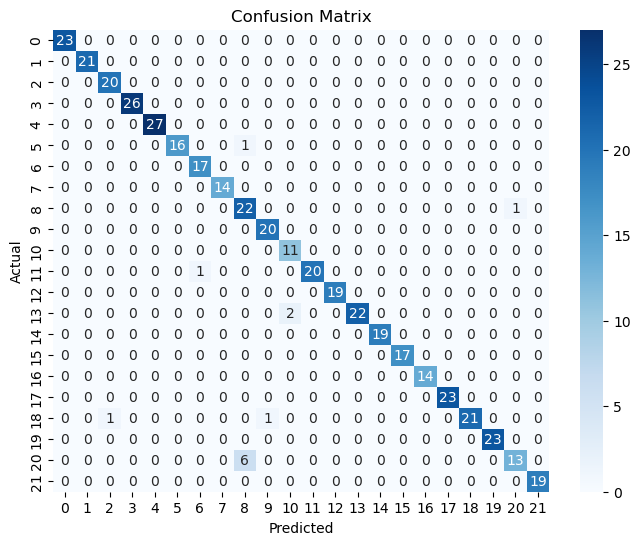

In [24]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')  # Use 'micro' for multiclass problems
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

conf_matrix = confusion_matrix(y_test, y_pred)

tn = np.sum(conf_matrix) - np.sum(conf_matrix[0, :]) - np.sum(conf_matrix[:, 0]) + conf_matrix[0, 0]
fp = np.sum(conf_matrix[0, :]) - conf_matrix[0, 0]
specificity = tn / (tn + fp)


print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall (Sensitivity): {:.2f}".format(recall))
print("Specificity: {:.2f}".format(specificity))
print("F1 Score: {:.2f}".format(f1))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [25]:
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

D:\Program Files\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.95
Precision: 0.95
Recall (Sensitivity): 0.95
Specificity: 1.00
F1 Score: 0.95


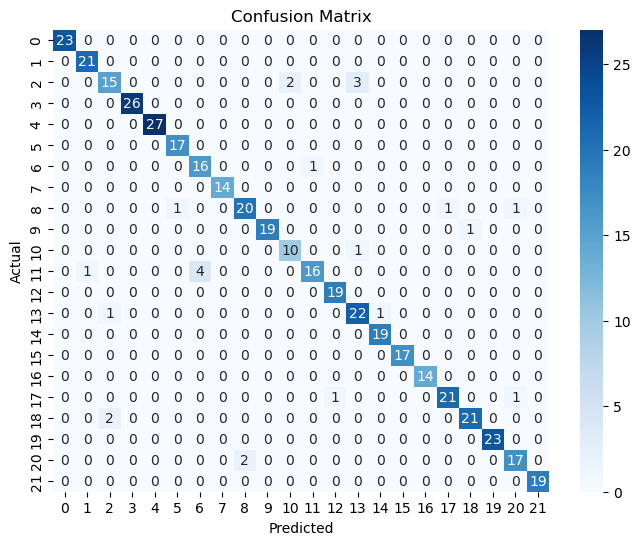

In [26]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')  # Use 'micro' for multiclass problems
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

conf_matrix = confusion_matrix(y_test, y_pred)

tn = np.sum(conf_matrix) - np.sum(conf_matrix[0, :]) - np.sum(conf_matrix[:, 0]) + conf_matrix[0, 0]
fp = np.sum(conf_matrix[0, :]) - conf_matrix[0, 0]
specificity = tn / (tn + fp)


print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall (Sensitivity): {:.2f}".format(recall))
print("Specificity: {:.2f}".format(specificity))
print("F1 Score: {:.2f}".format(f1))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()